<img width="100%" height="500" alt="Image" src="hq720.jpg" />

# 1. Import and Read the Data
<a id="1"></a>

In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 2.1 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 2.2 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.2 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 2.4 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 2.3 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 2.4 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 2.4 MB/s eta 0:00:02
   --------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

pd.set_option('display.max_columns', None)

In [7]:
data = pd.read_csv('D:/Aa Mohan/Learn/Data Analysis Projects/akp-✔️/loan_dataset.csv')

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,Credit Score Category
0,20,female,High School,226710,0,OWN,2000,VENTURE,8.59,0.01,4,619,Yes,0,Fair
1,20,male,Associate,226622,0,MORTGAGE,2000,EDUCATION,8.59,0.01,4,687,Yes,0,Good
2,20,male,Bachelor,226515,0,MORTGAGE,2000,PERSONAL,8.59,0.01,2,598,Yes,0,Fair
3,20,female,High School,226402,0,MORTGAGE,2000,VENTURE,8.59,0.01,4,531,Yes,0,Poor
4,20,female,High School,162939,0,MORTGAGE,15000,VENTURE,15.96,0.09,2,640,Yes,0,Fair


In [8]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 44992 rows and 15 columns.


In [9]:
print(f'The dataset has {data.isna().sum().sum()} null values.')

The dataset has 0 null values.


In [10]:
print(f'The dataset has {data.duplicated().sum()} duplicate values.')

The dataset has 0 duplicate values.


In [11]:
data.dtypes

person_age                          int64
person_gender                      object
person_education                   object
person_income                       int64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                           int64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length          int64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
Credit Score Category              object
dtype: object

The columns data type are correct. This is their meaning:

* **person_age.** Age of the person.
* **person_gender.** Gender of the person.
* **person_education.** Highest education level.
* **person_income.** Annual income.
* **person_emp_exp.** Years of employment experience.
* **person_home_ownership.** Home ownership status (e.g., rent, own, mortgage).
* **loan_amnt.** Loan amount requested.
* **loan_intent.** Purpose of the loan.
* **loan_int_rate.** Loan interest rate.
* **loan_percent_income.** Loan amount as a percentage of annual income.
* **cb_person_cred_hist_length.** Length of credit history in years.
* **credit_score.**	Credit score of the person.
* **previous_loan_defaults_on_file.** Indicator of previous loan defaults.
* **loan_status (target variable).** Loan approval status: 1 = approved; 0 = rejected.

In [12]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44992.000000,4.499200e+04,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000
mean,27.746955,7.990956e+04,5.392959,9583.245288,11.006448,0.139735,5.866087,632.582592,0.222262
std,5.901543,6.332239e+04,5.917871,6314.856103,2.979019,0.087207,3.875930,50.398623,0.415771
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577900e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,84.000000,2.448661e+06,62.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


# 2. Exploratory Data Analysis
<a id="2"></a>

## 2.1 Overview

<Figure size 1200x600 with 0 Axes>

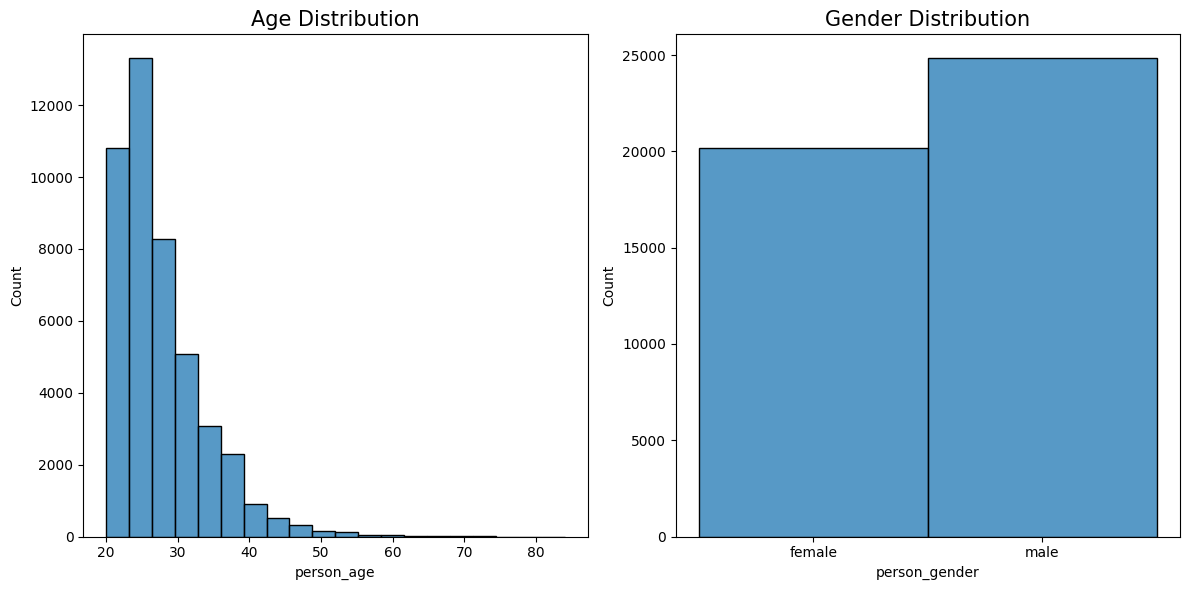

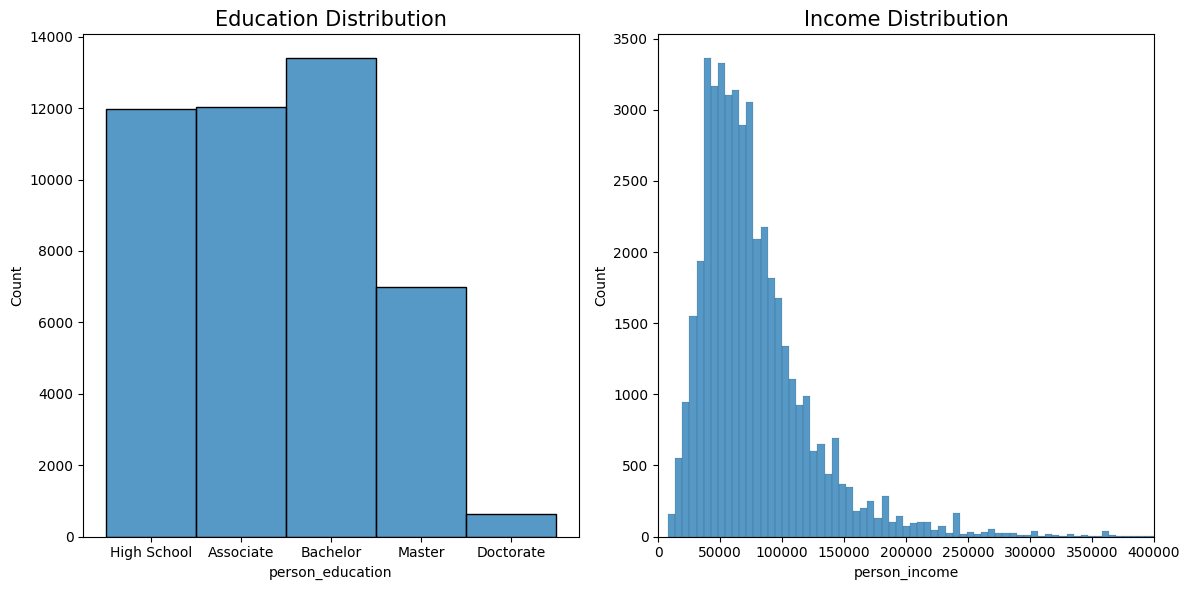

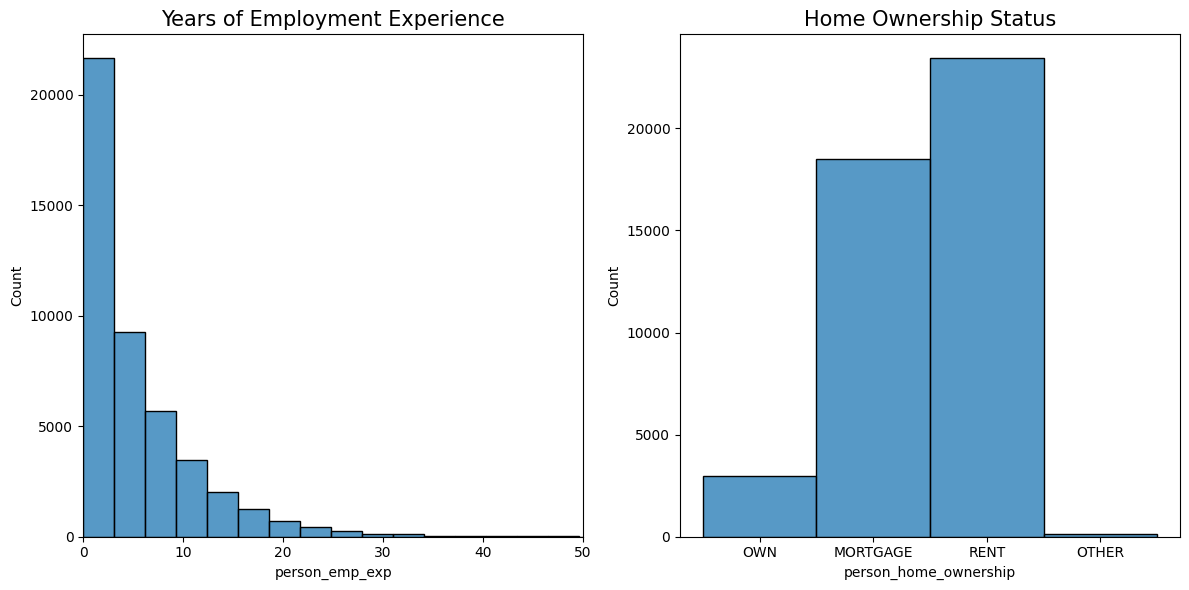

In [13]:
### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, middle, bottom) = bigfig.subfigures(3,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_age', bins=20, ax=ax1)
ax1.set_title('Age Distribution', size=15)

ax2 = sns.histplot(data=data, x='person_gender', ax=ax2)
ax2.set_title('Gender Distribution', size=15)

plt.tight_layout()

### Middle figure ###
middle.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_education', ax=ax1)
ax1.set_title('Education Distribution', size=15)

ax2 = sns.histplot(data=data, x='person_income', ax=ax2)
ax2.set_title('Income Distribution', size=15)
ax2.set_xlim(0, 400000)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_emp_exp', bins=20, ax=ax1)
ax1.set_title('Years of Employment Experience', size=15)
ax1.set_xlim(0, 50)

ax2 = sns.histplot(data=data, x='person_home_ownership', ax=ax2)
ax2.set_title('Home Ownership Status', size=15)

plt.tight_layout()

One can notice that:
* The person age and experience distributions are right skewed.
* There is a slight excess of male clients, even though the gender distribution is quite balanced.
* The majority of clients either pay rent or a mortgage.
* The income distribution is bell-shaped, but right skewed.

C:\Users\mohan\AppData\Local\Temp\ipykernel_18428\3235991938.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, size=8)


<Figure size 1200x600 with 0 Axes>

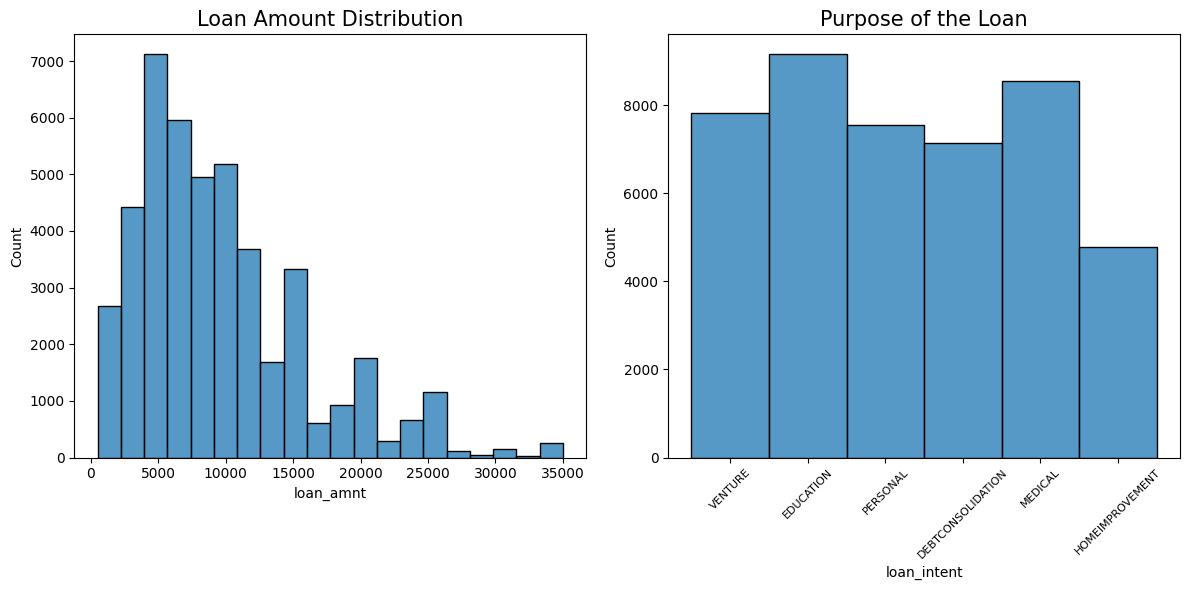

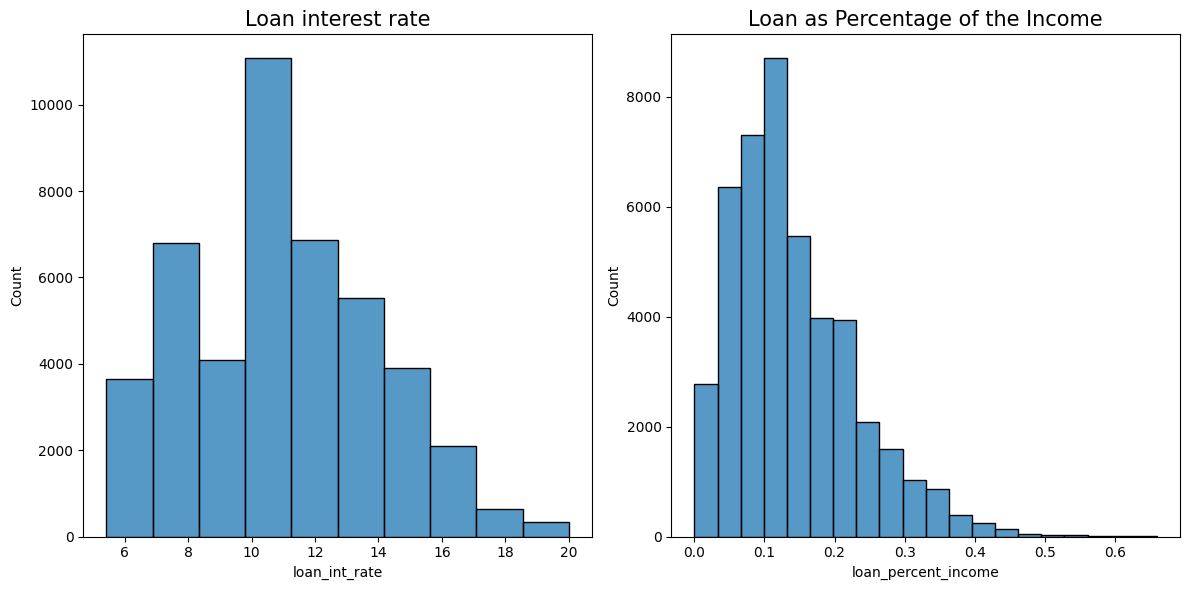

In [13]:
### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_amnt', bins=20, ax=ax1)
ax1.set_title('Loan Amount Distribution', size=15)

ax2 = sns.histplot(data=data, x='loan_intent', ax=ax2)
ax2.set_title('Purpose of the Loan', size=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, size=8)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_int_rate', bins=10, ax=ax1)
ax1.set_title('Loan interest rate', size=15)

ax2 = sns.histplot(data=data, x='loan_percent_income', bins=20, ax=ax2)
ax2.set_title('Loan as Percentage of the Income', size=15)

plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

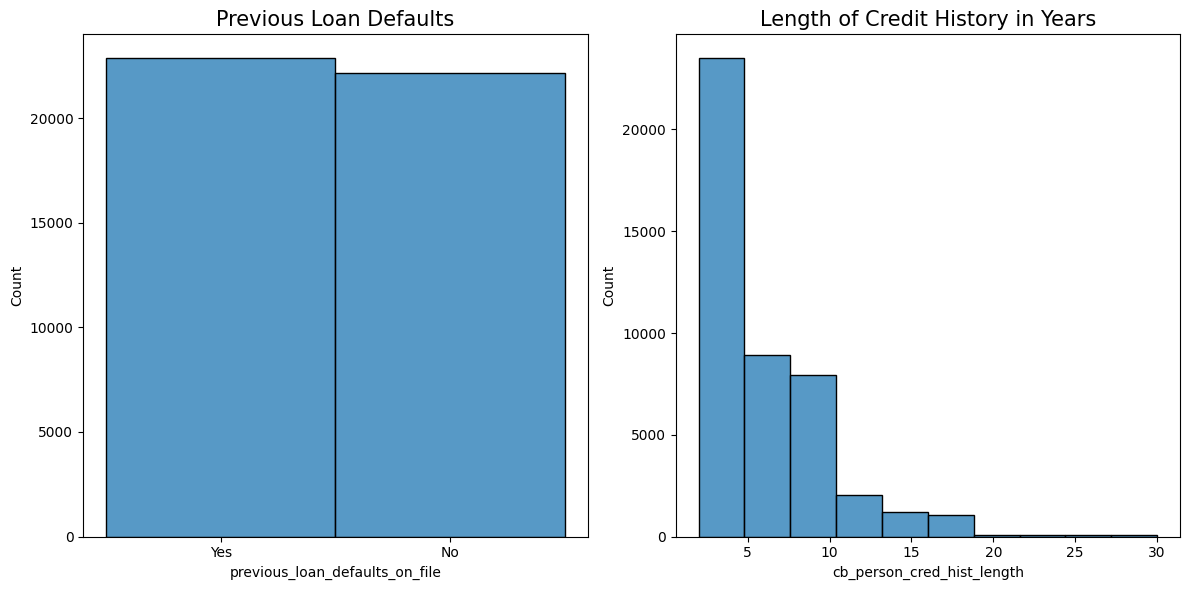

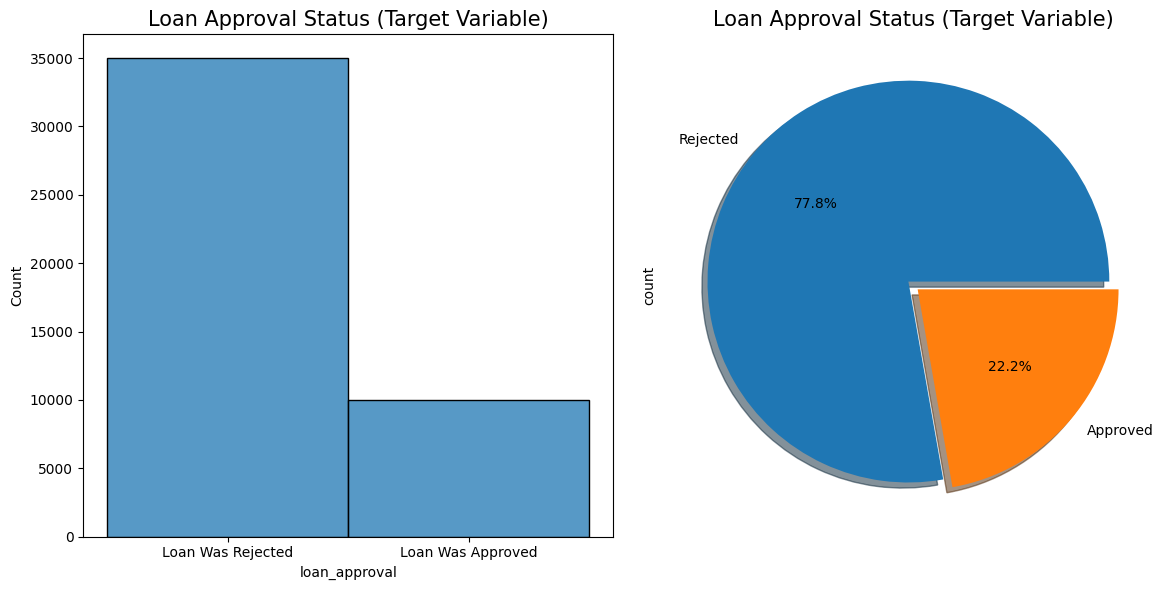

In [14]:
##########################
loan_approval = {0:'Loan Was Rejected', 1:'Loan Was Approved'}
data['loan_approval'] = data['loan_status'].map(loan_approval)

val = data['loan_approval'].value_counts()
##########################

### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='previous_loan_defaults_on_file', ax=ax1)
ax1.set_title('Previous Loan Defaults', size=15)

ax2 = sns.histplot(data=data, x='cb_person_cred_hist_length', bins=10, ax=ax2)
ax2.set_title('Length of Credit History in Years', size=15)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_approval', ax=ax1)
ax1.set_title('Loan Approval Status (Target Variable)', size=15)

val.plot(kind='pie', labels=['Rejected','Approved'], autopct="%1.1f%%", shadow=True, explode=(0.03,0.03))
ax2.set_title('Loan Approval Status (Target Variable)', size=15)

plt.tight_layout()

In [15]:
data.drop('loan_approval', axis=1, inplace=True)

One can notice that:
* Around half of the clients that asked for a loan have a history of loan default.
* The majority of loan requests were rejected. It will be interesting to find what are the main reasons for the loan rejection.

## 2.2 Loan Interest Rate

I am curious to find what are the main factors that determine the large variability in the loan interest rate.

<Figure size 1200x600 with 0 Axes>

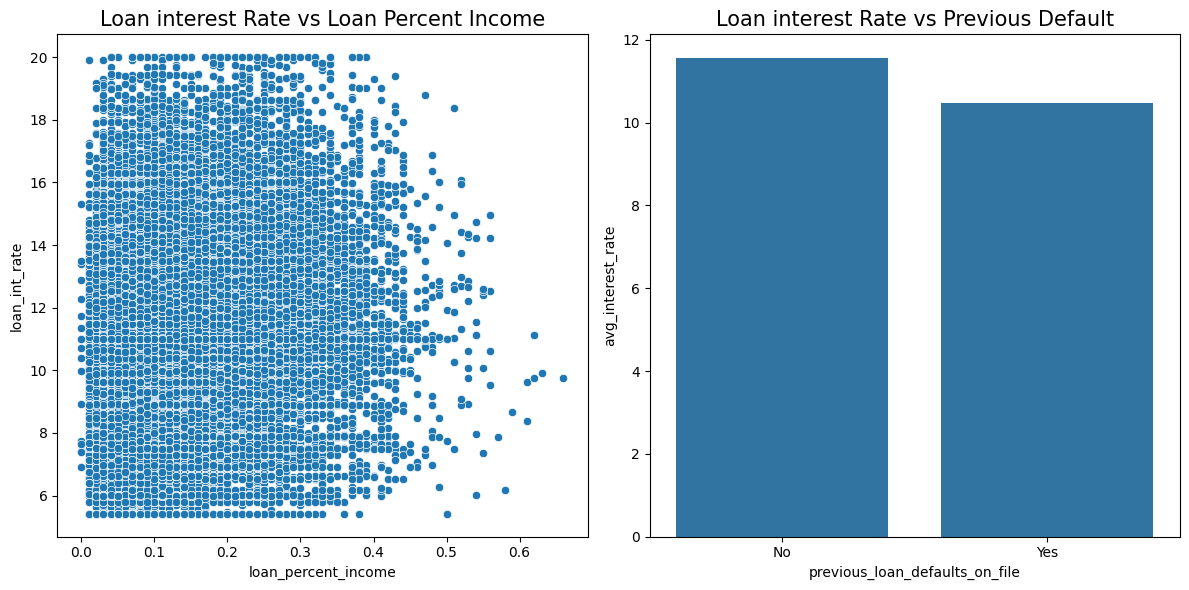

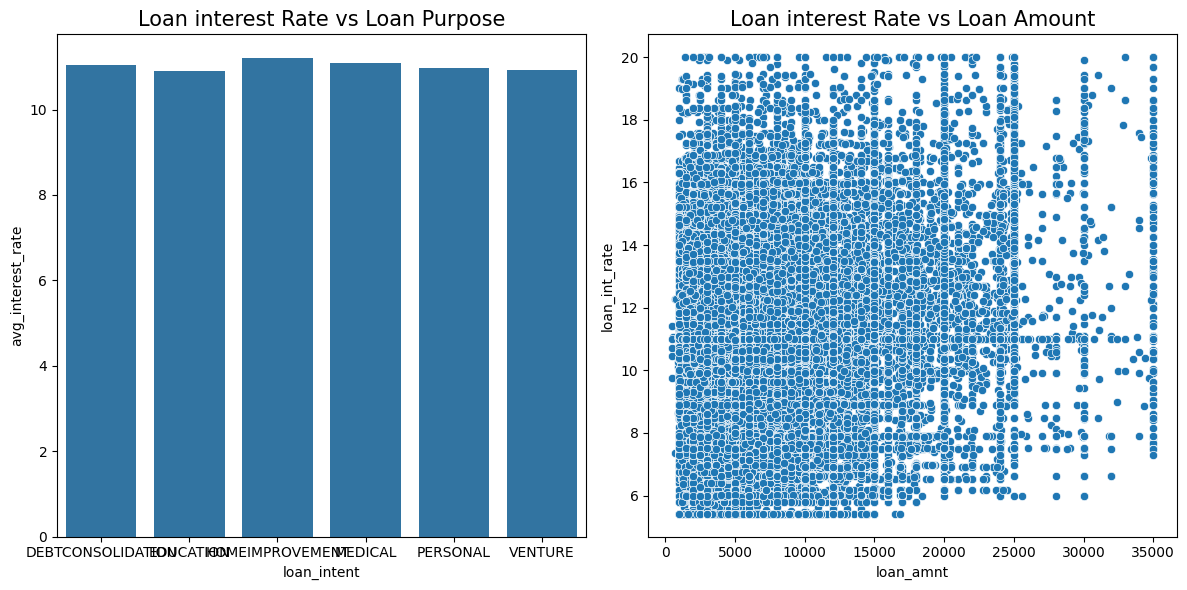

In [16]:
#######################################
int_rate_default = data.groupby('previous_loan_defaults_on_file')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')

int_rate_purpose = data.groupby('loan_intent')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')
#######################################

### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.scatterplot(data=data, x='loan_percent_income', y='loan_int_rate', ax=ax1)
ax1.set_title('Loan interest Rate vs Loan Percent Income', size=15)

ax2 = sns.barplot(data=int_rate_default, x='previous_loan_defaults_on_file', y='avg_interest_rate', ax=ax2)
ax2.set_title('Loan interest Rate vs Previous Default', size=15)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.barplot(data=int_rate_purpose, x='loan_intent', y='avg_interest_rate', ax=ax1)
ax1.set_title('Loan interest Rate vs Loan Purpose', size=15)

ax2 = sns.scatterplot(data=data, x='loan_amnt', y='loan_int_rate', ax=ax2)
ax2.set_title('Loan interest Rate vs Loan Amount', size=15)

plt.tight_layout()

Apparently, there is no relation between the interest rate and other variables, like the person income or the loan purpose.

Let's plot a correlation heatmap to further explore this issue.

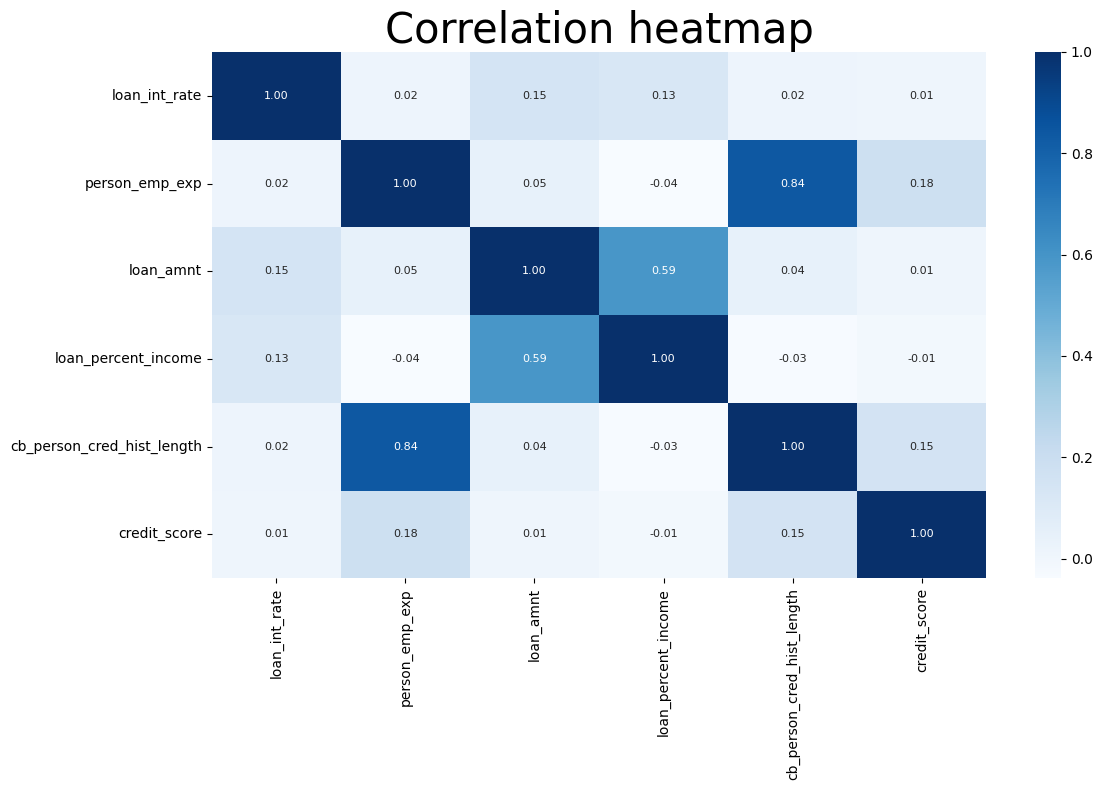

In [17]:
selected_features = ['loan_int_rate', 
                     'person_emp_exp', 
                     'loan_amnt', 
                     'loan_percent_income',
                     'cb_person_cred_hist_length',
                     'credit_score']

plt.figure(figsize=(12,8))
sns.heatmap(data[selected_features].corr(method='pearson'),annot=True,fmt='.2f',annot_kws={"fontsize":8},cmap='Blues')
plt.title('Correlation heatmap',fontsize=30)

plt.tight_layout()
plt.show()

### Key_Insights
1. Data Overview:
    - The dataset contains 44,992 entries with 15 columns.
    - No missing values in any column.
    - Mix of numerical and categorical variables related to personal information and loan details.

2. Demographic Insights:
    - Age: Most applicants are young (20-21 years old).
    - Gender: Slightly more male applicants than female.
    - Education: Most common education levels are High School and Bachelor's degree.
    - Income: Wide range from 9,650 to 301,035 with most between 30,000−100,000.
    - Employment Experience: Most applicants have 0-3 years of experience.

3. Loan Characteristics:
    - Loan Amount: Ranges from 200 to 30,000 with median around $7,000.
    - Interest Rates: Range from 5.42% to 20%, with median around 11%.
    - Loan Intent: Most common purposes: EDUCATION (28%), MEDICAL (21%), PERSONAL (19%).

4. Credit Profile:
    - Credit Score: Ranges from 449 to 722.
    - Credit Categories: Fair (500-669) = 65%, Good (670-739) = 25%, Poor (<500) = 10%
    - Credit History Length: Most applicants have 2-4 years of credit history.
    - Previous Defaults: About 40% of applicants have defaulted on previous loans.

5. Key Relationships:
    - Higher Loan Amounts: Associated with EDUCATION intent and higher education levels.
    - Higher Interest Rates: Seen for applicants with "Poor" credit scores.
    - Default Rates: Highest among "Poor" credit score category (60%) and lowest among "Good" (20%).
    - Income to Loan Ratio: Lowest for EDUCATION loans, suggesting these borrowers may be more leveraged.


6. Home Ownership Patterns:
    - MORTGAGE holders (45%) take larger loans than RENTers (40%).
    - OWNers (15%) have the highest income-to-loan ratios.

7. Education Impact:
    - Those with Master's degrees tend to have higher credit scores (680+) and lower default rates (25%).
    - High School educated applicants have the highest default rates (50%) and lowest average loan amounts.

8. Loan Purpose Insights:
    - MEDICAL loans have the highest average interest rates (13.5%).
    - VENTURE loans have the highest average loan amounts ($9,200).
    - EDUCATION loans have the lowest income-to-loan ratios, indicating potential financial strain.

9. Gender Differences:
    - Male applicants:
        - Slightly higher average loan amounts.
        - More likely to take VENTURE/EDUCATION loans.
    - Female applicants:
        - More likely to take MEDICAL/PERSONAL loans.
        - Slightly lower default rates (38% vs. 42% for males).

### Risk_Insights
1. Risk Segmentation:
    - High-risk applicants: 
        - Poor credit + EDUCATION loans (default rate = 70%).
        - High School education + low income
    - Low-risk applicants: 
        - Good credit + MORTGAGE ownership (default rate = 15%).
        - Master's degree + higher income

2. Employment & Risk:
    - Applicants with 0 years of experience:
        - Higher default rates (45%).
        - Smaller loan amounts approved.
    - 3+ years of experience:
        - Lower default rates (30%).
        - Higher credit scores.

### Correlation_Insights
1. Strong Positive Correlations:
    - Credit score vs. Credit history length: Applicants with longer credit histories tend to have better credit scores.
    - Income vs. Loan amount: Higher income is associated with larger loan amounts.

2. Strong Negative Correlations:
    - Interest rate vs. Credit score: Better credit scores are associated with lower interest rates.

3. Weak or No Correlation:
    - Loan percent income and other variables: No strong relationship observed.
    - Loan purpose and interest rate: No significant correlation found.

These correlations highlight the importance of credit score and income in determining loan characteristics like interest rates and loan amounts.